### Create first output 

In [3]:
##############################################################
#Developed by Jonathan Ojeda 5-12-2020 QAAFI-UQ
#Collaborator Alex Wu QAAFI-UQ
#two files required: treatmentID + LICOR output from the device
##############################################################

#Importing required packages
import pandas as pd
import numpy as np

#get data from licor (just as LICOR exported it!!!!)
data0= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\0000. UQ\AlexWu\AWu20201204green.txt',sep='\t')

#get treatment list (change file every day!!!!)
treat= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\0000. UQ\AlexWu\treatmentID.csv')

#clean some columns
data.columns = data0.iloc[0]
data1 = data.drop([0,1,2])

#remove columns with nana values
data2=data1.dropna()

#create common column between the two dataframes
treat['ID'] = np.arange(len(treat))
data2['ID'] = np.arange(len(data2))

#merge the two dataframes basen on the common column
final0 = pd.merge(left=data2, right=treat, left_on='ID', right_on='ID')

#remove columns not needed
final=final0.drop(['time', 'elapsed', 'date', 'newDef_0', 'TIME', 'Pci', 'Pca', 'gbw', 'gtw', 'gtc', 'Rabs', 'TleafEB',
 'TleafCnd', 'SVPleaf', 'RHcham', 'VPcham', 'SVPcham', 'LatHFlux', 'SenHFlux', 'NetTherm', 'EBSum', 'Leak', 'LeakPct',
 'CorrFact', 'CorrFactPct', 'Fan', 'alpha', 'convert', 'S', 'K', 'Geometry', 'Custom', 'TIME', 'CO2_s', 'H2O_s', 'CO2_a',
 'H2O_a', 'Flow', 'Pa', 'ΔPcham', 'Tair', 'Tleaf2', 'Offset', 'Offset2', 'Fan_speed', 'Qamb_in', 'ΔCO2', 'CO2_s_d',
 'CO2_r_d', 'ΔH2O', 'CO2_b', 'H2O_b', 'e_s', 'e_r', 'Td_s', 'Td_r', 'Q', 'f_red', 'f_blue', 'Tled', 'Pc', 'time',
 'co2_t', 'h2o_t', 'count', 'co2_adj', 'h2o_adj', 'co2_match', 'h2o_match', 'co2_at', 'h2o_at', 'co2_cv', 'h2o_cv',
 'A:MN', 'A:SLP', 'A:SD', 'A:OK', 'Ci:MN', 'Ci:SLP', 'Ci:SD', 'Ci:OK', 'E:MN', 'E:SLP', 'E:SD', 'E:OK', 'gsw:MN',
 'gsw:SLP', 'gsw:SD', 'gsw:OK', 'State', 'Vflow', 'VPchamber', 'abs_c_a', 'abs_c_b', 'abs_h_a', 'abs_h_b', 'Wc_s', 'Wc_r',
 'Wco_s', 'Wco_r', 'Ww_s', 'Ww_r', 'Wwo_s', 'Wwo_r', 'Flow_s_v', 'Flow_r_v', 'Tleaf_mv', 'Tleaf2_mv', 'Tleaf_j', 'Tleaf2_j',
 'Console_RH', 'Console_T', 'Console_H2O', 'Fan_%', 'Flow_%', 'Pump', 'Tchp_pwm', 'Txchg_pwm', 'diag_20v', 'diag_5_4v',
 'diag_12v', 'diag_5va', 'diag_3_3vf', 'AccH2O_des', 'CO2_hrs', 'AccH2O_hum', 'AccCO2_soda', 'ADC_CH1', 'ADC_CH2', 'ADC_CH3',
 'ADC_CH4', 'ADC_CH5', 'ADC_CH6', 'ADC_CH7', 'ADC_CH8', 'DAC_1', 'DAC_2', 'DAC_3', 'DAC_4', 'GPIO', 'GPIO_dir', 'excit_5v',
 'power_12v', 'power_5v', 'ch1_pullup', 'AuxPower', 'MatchValveR', 'MatchValveS', 'MatchCO2', 'MatchH2O', 'cf_co2_a', 
 'cf_co2_b', 'cf_co2_c', 'cf_co2_d', 'cf_h2o_a', 'cf_h2o_b', 'cf_h2o_c', 'cf_h2o_d', 'co2_fit_low', 'co2_fit_high',
 'h2o_fit_low', 'h2o_fit_high', 'co2_elapsed', 'h2o_elapsed', 'DIAG', 'Flow_s', 'Flow_r', 'Tirga', 'Tchopper', 'Ts', 
 'Tr', 'Txchg_sp', 'CO2_r_sp', 'H2O_r_sp', 'SS_s', 'SS_r', 'ID'],axis=1)

#Split treat column into columns, one for each factor that determine the treatment
final['sprep'] = final['treat'].str.slice(0,2)
final['leaf'] = final['treat'].str.slice(3,6)
final['curve_type'] = final['treat'].str.slice(7,10)
final['licor'] = final['treat'].str.slice(11,16)
final['temp'] = final['treat'].str.slice(17,20)
final['date'] = final['treat'].str.slice(21,30)
final['sky'] = final['treat'].str.slice(31,36)
final['something'] = final['treat'].str.slice(37,39)

#Re-Order columns
final = final[['treat', 'obs', 'ID_OBS', 'sprep', 'leaf','curve_type', 'licor', 'temp', 'date', 'sky', 'something','hhmmss',
               'E', 'A', 'Ca', 'Ci', 'gsw', 'VPDleaf', 'Qin', 'Qabs','CO2_r', 'H2O_r', 'Tleaf', 'Qamb_out', 'Stable',
               'Total', 'Txchg','CO2_%', 'Desiccant_%', 'Humidifier_%']]

#Get output (specify address!!!)
final.to_csv(r'C:\Users\uqjojeda\Dropbox\0000. UQ\AlexWu\output.csv')

<ipython-input-3-019c9ee27881>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ID'] = np.arange(len(data2))
<ipython-input-3-019c9ee27881>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['sprep'] = final['treat'].str.slice(0,2)
<ipython-input-3-019c9ee27881>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

### Append files 

In [45]:
#get data from licor (just as LICOR exported it!!!!)
blue= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\0000. UQ\AlexWu\append\AWu20201130blue_out.csv',sep=',')
green= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\0000. UQ\AlexWu\append\AWu20201130green_out.csv',sep=',')
red= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\0000. UQ\AlexWu\append\AWu20201130red_out.csv',sep=',')

In [46]:
#Concat n files
final0 = pd.concat([blue, red, green])

In [47]:
final=final0.drop(['Unnamed: 0'],axis=1) 

In [49]:
final['crop'] = final['treat'].str[:1]

#Re-Order columns
final = final[['treat', 'obs', 'ID_OBS','crop', 'sprep', 'leaf','curve_type', 'licor', 'temp', 'date', 'sky','hhmmss',
               'E', 'A', 'Ca', 'Ci', 'gsw', 'VPDleaf', 'Qin', 'Qabs','CO2_r', 'H2O_r', 'Tleaf', 'Qamb_out', 'Stable',
               'Total', 'Txchg','CO2_%', 'Desiccant_%', 'Humidifier_%']]

In [50]:
final

,treat,obs,ID_OBS,crop,sprep,leaf,curve_type,licor,temp,date,...,CO2_r,H2O_r,Tleaf,Qamb_out,Stable,Total,Txchg,CO2_%,Desiccant_%,Humidifier_%
0,s2_L10_ACi_Blue0_30C_2020Nov30_light_ON,1,1,s,s2,L10,ACi,Blue0,30C,2020Nov30,...,399.962161,22.239432,30.052661,1136.381290,4,4,29.5998,20.58560,27.4456,65.719600
1,s2_L10_ACi_Blue0_30C_2020Nov30_light_ON,2,2,s,s2,L10,ACi,Blue0,30C,2020Nov30,...,49.984758,19.321300,29.940665,1068.480323,3,4,29.3551,4.54657,37.8556,59.096700
2,s2_L10_ACi_Blue0_30C_2020Nov30_light_ON,3,3,s,s2,L10,ACi,Blue0,30C,2020Nov30,...,74.992087,18.172958,30.000513,1086.861613,4,4,30.1320,5.72474,38.9313,51.941600
3,s2_L10_ACi_Blue0_30C_2020Nov30_light_ON,4,4,s,s2,L10,ACi,Blue0,30C,2020Nov30,...,99.977093,18.867870,30.061473,1036.719000,4,4,29.3585,6.91670,35.8553,45.903400
4,s2_L10_ACi_Blue0_30C_2020Nov30_light_ON,5,5,s,s2,L10,ACi,Blue0,30C,2020Nov30,...,124.982367,19.874600,30.001340,1169.116667,4,4,29.4494,8.12007,30.5613,41.416100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,m4_L10_AI0_Green_30C_2020Nov30_00000_ON,113,8,m,m4,L10,AI0,Green,30C,2020Nov30,...,399.901000,24.728100,29.974600,1554.570000,4,4,28.1633,20.79040,16.5074,0.694674
110,m4_L10_AI0_Green_30C_2020Nov30_00000_ON,114,9,m,m4,L10,AI0,Green,30C,2020Nov30,...,400.010000,26.322800,29.994300,1517.810000,4,4,27.3283,20.72000,13.7160,11.576500
111,m4_L10_AI0_Green_30C_2020Nov30_00000_ON,115,10,m,m4,L10,AI0,Green,30C,2020Nov30,...,400.044000,26.645800,30.059700,1493.610000,4,4,27.4870,20.66040,16.9995,19.472900
112,m4_L10_AI0_Green_30C_2020Nov30_00000_ON,116,11,m,m4,L10,AI0,Green,30C,2020Nov30,...,400.084000,26.465500,29.930700,1471.570000,4,4,28.1071,20.64910,19.0294,22.063800


In [62]:
aci=final.loc[final['curve_type'] == 'ACi']

In [31]:
list(final.columns)

['treat',
 'obs',
 'ID_OBS',
 'sprep',
 'leaf',
 'curve_type',
 'licor',
 'temp',
 'date',
 'sky',
 'LED',
 'hhmmss',
 'hhmmss.1',
 'E',
 'A',
 'Ca',
 'Ci',
 'gsw',
 'VPDleaf',
 'Qin',
 'Qabs',
 'CO2_r',
 'H2O_r',
 'Tleaf',
 'Qamb_out',
 'Stable',
 'Total',
 'Txchg',
 'CO2_%',
 'Desiccant_%',
 'Humidifier_%']

### Plotting

In [ ]:
#final.rename(columns={'yield':'yield_mean','irri':'irri_mean'}, inplace=True)

In [52]:
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

<ipython-input-52-54a687e38559>:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


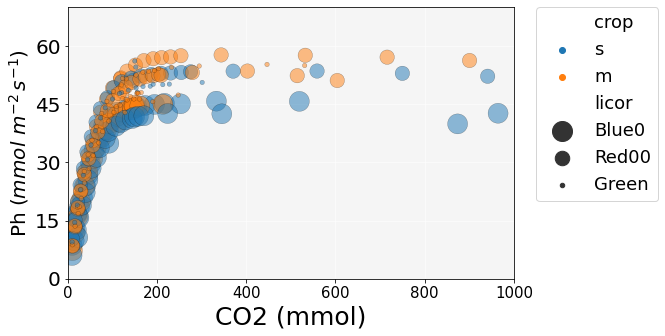

In [68]:
#color_dict = dict({'PODOSOL':'#e6194b','KUROSOL':'#3cb44b','TENOSOL': '#ffe119','FERROSOL': '#4363d8','DERMOSOL': '#f58231','CHROMOSOL':'#800000',
#                  'KANDOSOL':'#46f0f0','SODOSOL':'#f032e6'})

kwargs  =   {'edgecolor':"k"}

fig = plt.figure(figsize=(8,5))

ax=plt.subplot(1, 1, 1)

#ax.set_title('15km x 15km',fontsize= 25,weight='bold') 
#ax.title.set_position([0.5,1.01])

sns.scatterplot(x="Ci", y="A", hue="crop",size="licor",sizes=(20, 400), alpha=0.5, 
                data=aci,linewidth=0.3, **kwargs) #palette=color_dict, 

# Formatting graph and background
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Ph ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('CO2 (mmol)', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,1000])
ax.set_ylim([0,70])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)